In [ ]:
#from the given Dataset predict the optimum number of cluster and reprsent it viusally.
#used Collab for this task.
#Dataset "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view"


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
# Load iris dataset
data = pd.read_csv('/content/Iris.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Drop the 'Species' column
data.drop('Species', axis=1, inplace=True)

In [ ]:
# Drop the 'Id' column
data.drop('Id', axis=1, inplace=True)

In [ ]:
#EDA on Iris Dataset
print(data.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


**Visualize the distribution of each feature using histograms to understand their shape and spread.**

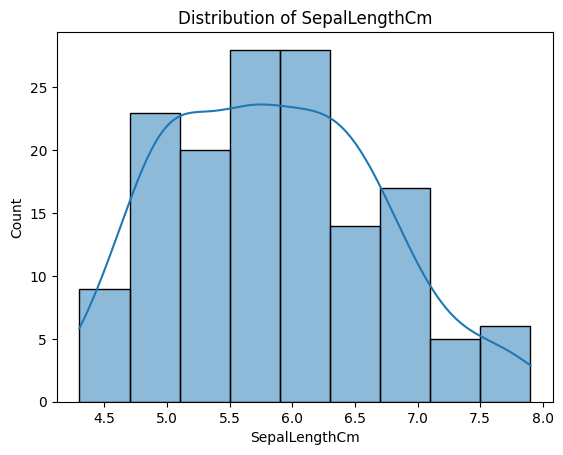

In [ ]:
sns.histplot(data['SepalLengthCm'], kde=True)
plt.title('Distribution of SepalLengthCm')
plt.show()

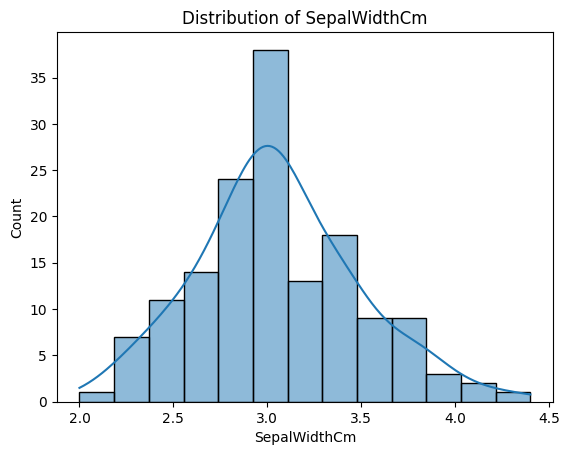

In [ ]:
sns.histplot(data['SepalWidthCm'], kde=True)
plt.title('Distribution of SepalWidthCm')
plt.show()

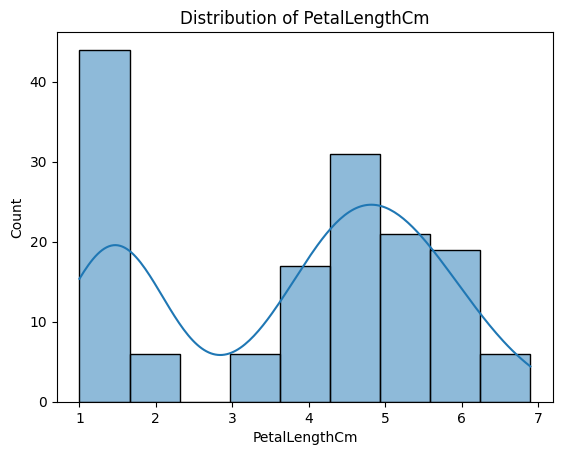

In [ ]:
sns.histplot(data['PetalLengthCm'], kde=True)
plt.title('Distribution of PetalLengthCm')
plt.show()

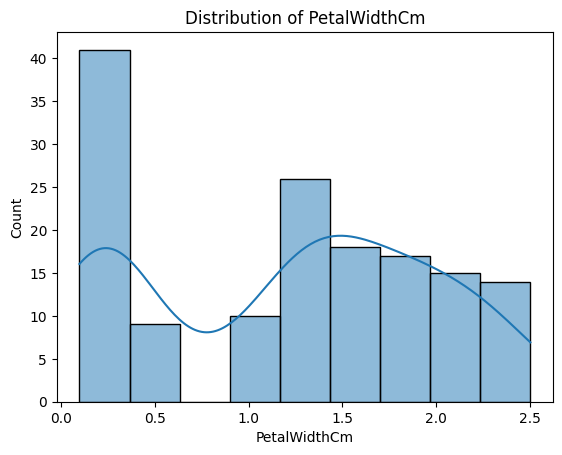

In [ ]:
sns.histplot(data['PetalWidthCm'], kde=True)
plt.title('Distribution of PetalWidthCm')
plt.show()

**Create a pairplot to visualize pairwise relationships between each features. This helps to identify potential correlations**

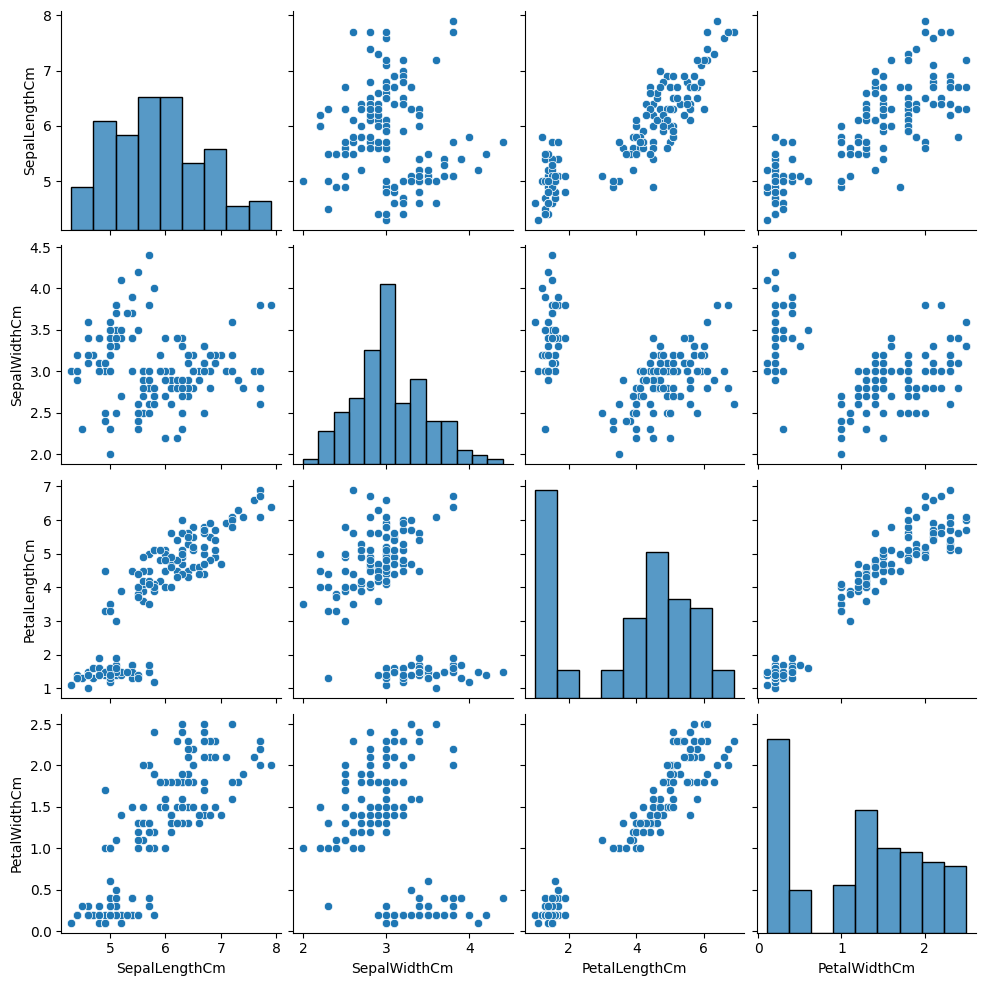

In [ ]:
sns.pairplot(data)
plt.show()

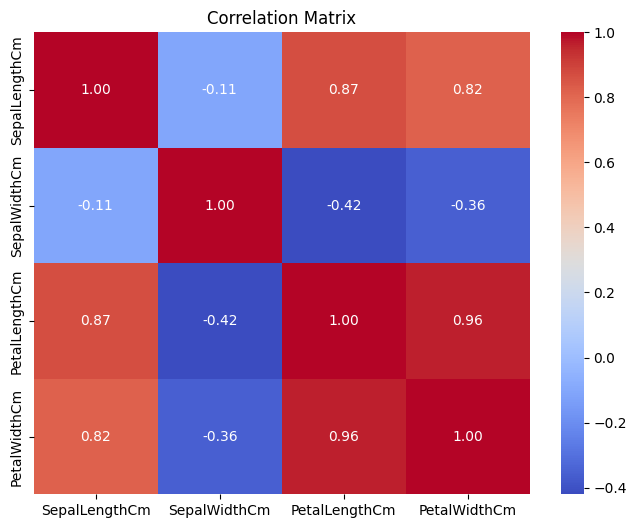

In [ ]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Select features
X = data.iloc[:, [0,1,2,3]].values


In [ ]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

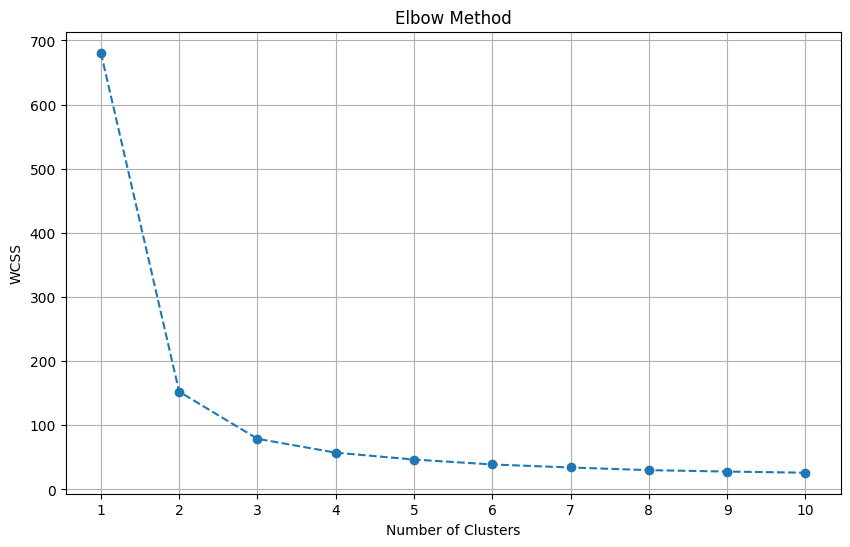

In [ ]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

After running above code, i seen a plot with the number of clusters on the x-axis and the corresponding WCSS values on the y-axis. And  Identifed the point 2 where the rate of decrease in WCSS slows down, forming an "elbow" shape. This point represents the optimal number of clusters.

In [ ]:
# Fit KMeans with the optimal number of clusters
optimal_k = 3  # Change this to the number of clusters you determined
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

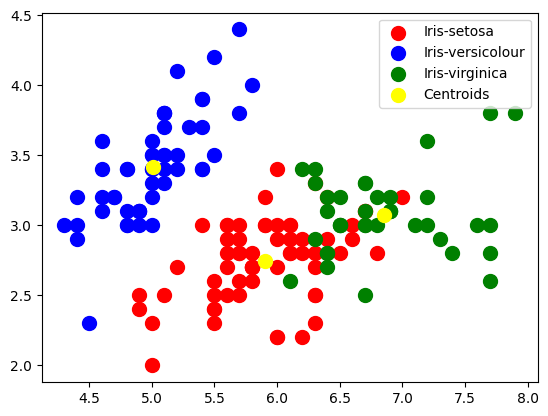

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()